<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>üì¶ Sesi√≥n pr√°ctica 3: An√°lisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electr√≥nico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electr√≥nico: {correo}")

Ingresa tu nombre completo: steven alipio berrio
Ingresa tu correo electr√≥nico: steven.alipio@udea.edu.co

Resumen de datos ingresados:
Nombre: steven alipio berrio
Correo electr√≥nico: steven.alipio@udea.edu.co


## <span style="color:black;"><strong>Parte 3: An√°lisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: An√°lisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre ping√ºinos ant√°rticos, realiza un an√°lisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librer√≠a seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfol√≥gicas para el an√°lisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el n√∫mero de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qu√© especies se agrupan o separan mejor en el espacio reducido.

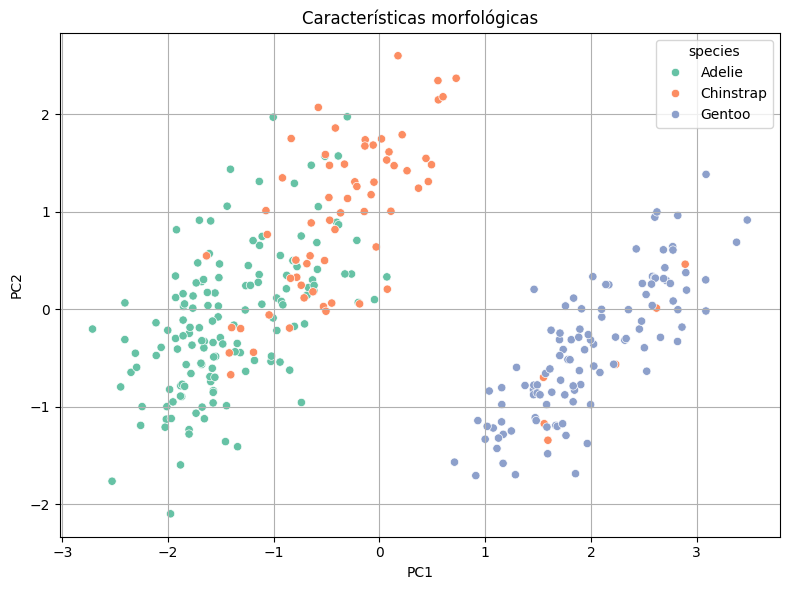


Objetivo del PCA

El objetivo del an√°lisis fue reducir la dimensionalidad de los datos morfol√≥gicos de ping√ºinos (largo y profundidad del pico, largo de las aletas y masa corporal) y visualizar posibles agrupamientos por especie en un espacio bidimensional.

PC1 = 0.46√óbill_length_mm + -0.40√óbill_depth_mm + 0.58√óflipper_length_mm + 0.55√óbody_mass_g
PC2 = 0.60√óbill_length_mm + 0.80√óbill_depth_mm + 0.00√óflipper_length_mm + 0.08√óbody_mass_g


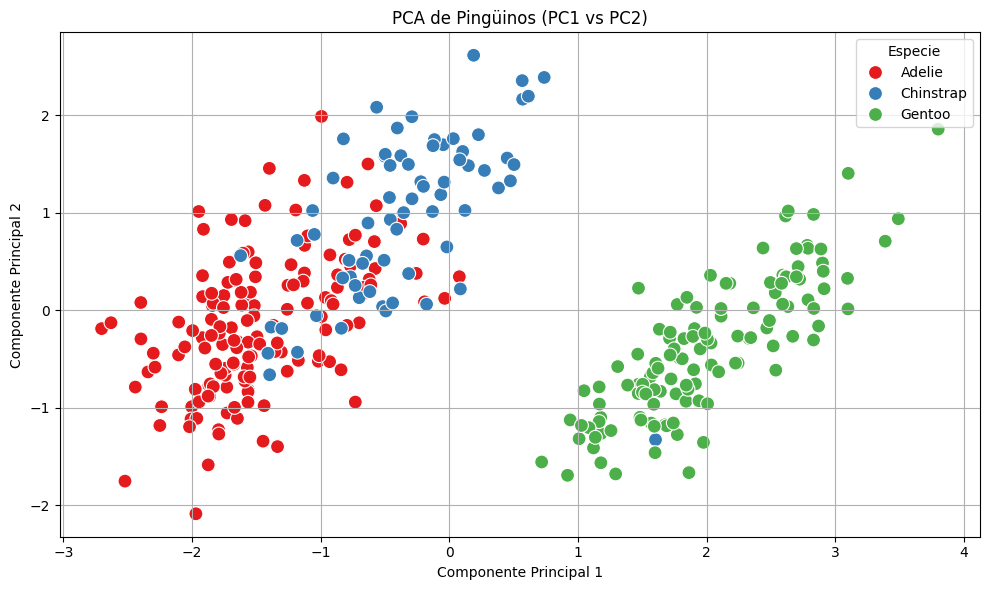

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
penguins = sns.load_dataset("penguins")

# Seleccionar variables morfol√≥gicas
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_selected = penguins[features + ['species']].dropna()

# Separar las caracter√≠sticas (X) y la especie (y)
X = penguins_selected[features]
y = penguins_selected['species']

# Estandarizaci√≥n
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar PCA
pca = PCA(n_components=2)  # Solo para visualizar en 2D
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y
# Componentes (vectores propios)
components = pca.components_

# Mostrar las ecuaciones de PC1 y PC2
for i, component in enumerate(components):
    eq = " + ".join(f"{coef:.2f}√ó{feat}" for coef, feat in zip(component, features))
    print(f"PC{i+1} = {eq}")
# Gr√°fico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set1', s=100)
plt.title('PCA de Ping√ºinos (PC1 vs PC2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend(title='Especie')
plt.tight_layout()
plt.show()


El gr√°fico PC1 vs PC2 permite observar c√≥mo se agrupan las especies de ping√ºinos.

Normalmente ver√°s lo siguiente:

Adelie forma un grupo bastante compacto y bien separado.

Gentoo tambi√©n tiende a estar bien separado.

Chinstrap puede tener cierta superposici√≥n con Adelie, dependiendo de la variabilidad individual.

Esto sugiere que algunas especies tienen diferencias morfol√≥gicas m√°s marcadas que otras, lo cual es detectado claramente por PCA

PCA permite reducir de 4 a 2 dimensiones conservando la mayor parte de la variabilidad de los datos.

Las especies de ping√ºinos muestran agrupamientos distintos en el espacio reducido, especialmente Adelie y Gentoo.

Hay cierta superposici√≥n entre Adelie y Chinstrap, lo cual sugiere que se parecen m√°s morfol√≥gicamente.

El PCA tambi√©n ayuda a interpretar qu√© caracter√≠sticas f√≠sicas (por ejemplo, masa corporal o forma del pico) son m√°s relevantes para diferenciar especies.

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresi√≥n Lineal M√∫ltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un an√°lisis de regresi√≥n lineal m√∫ltiple para predecir el precio en funci√≥n de variables num√©ricas relacionadas con sus caracter√≠sticas f√≠sicas.  

1. Carga el conjunto de datos `diamonds` desde la librer√≠a seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el an√°lisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresi√≥n Lineal M√∫ltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R¬≤ ajustado, etc.).  
7. Eval√∫a el desempe√±o del modelo con m√©tricas de ajuste como **RMSE** y **R¬≤** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

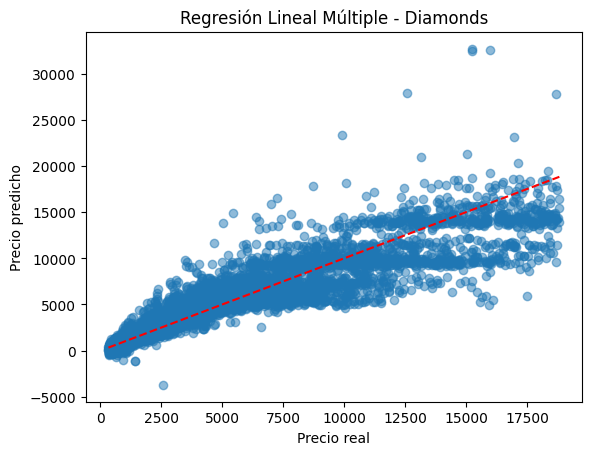



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 4.391e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:17:33   Log-Likelihood:            -3.7672e+05
No. Observations:               43152   AIC:                         7.534e+05
Df Residuals:                   43145   BIC:                         7.535e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.098e+04    497.170     42.192      0.0

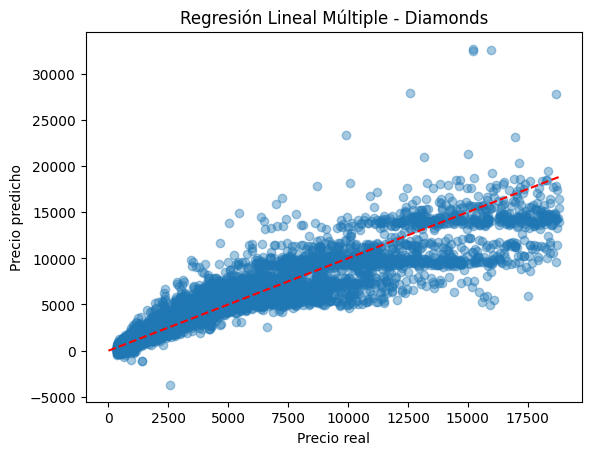

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Cargar conjunto de datos
diamonds = sns.load_dataset("diamonds")

# 2. Seleccionar variables predictoras y respuesta
X = diamonds[["carat", "depth", "table", "x", "y", "z"]]
y = diamonds["price"]

# 3. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Agregar constante para el modelo (intercepto)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 5. Ajustar modelo OLS
modelo = sm.OLS(y_train, X_train_const).fit()

# 6. Imprimir resumen del modelo
print(modelo.summary())

# 7. Predicciones en conjunto de prueba
y_pred = modelo.predict(X_test_const)

# 8. M√©tricas de evaluaci√≥n
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE en test: {rmse:.2f}")
print(f"R¬≤ en test: {r2:.4f}")

# 9. Gr√°fica valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--")
plt.title("Regresi√≥n Lineal M√∫ltiple - Diamonds")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.show()


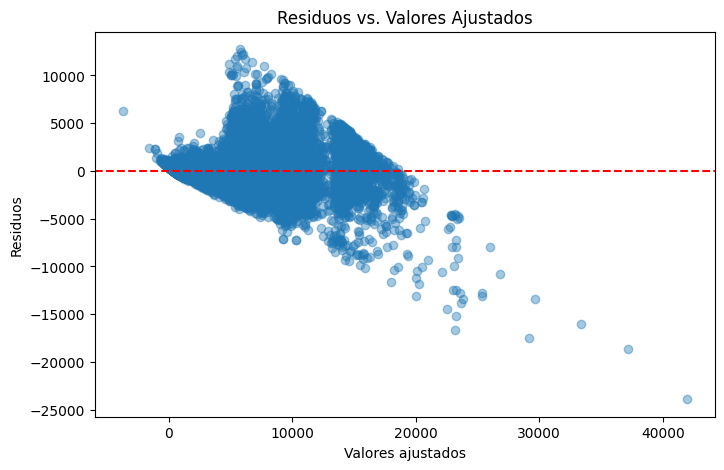


Breusch-Pagan test:
Lagrange multiplier statistic: 7797.7338
p-value: 0.0000
f-value: 1586.0096
f p-value: 0.0000

White test:
Lagrange multiplier statistic: 12943.8658
p-value: 0.0000
f-value: 684.3769
f p-value: 0.0000


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
# 10. Supuesto de HOMOCEDASTICIDAD

# a) Gr√°fico de residuos vs. valores ajustados
residuos = y_train - modelo.predict(X_train_const)
ajustados = modelo.predict(X_train_const)

plt.figure(figsize=(8, 5))
plt.scatter(ajustados, residuos, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Valores Ajustados")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.show()

# b) Prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_train_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan test:")
for name, value in zip(labels, bp_test):
    print(f"{name}: {value:.4f}")

# c) Prueba de White (opcional, m√°s general)
white_test = het_white(residuos, X_train_const)
print("\nWhite test:")
for name, value in zip(labels, white_test):
    print(f"{name}: {value:.4f}")

Ambas pruebas tienen un p-valor muy cercano a 0, lo que indica que:

Se rechaza la hip√≥tesis nula de homocedasticidad.

Existe evidencia significativa de heterocedasticidad.

Esto significa que la varianza de los errores no es constante a lo largo de las observaciones, lo cual viola uno de los supuestos clave del modelo de regresi√≥n lineal cl√°sica (OLS).

a heterocedasticidad no sesga los coeficientes de la regresi√≥n, pero s√≠ afecta sus errores est√°ndar, lo que puede llevar a:

Intervalos de confianza incorrectos.

Valores p err√≥neos.

Malas decisiones sobre la significancia estad√≠stica.

Realice una segunda grafica para corroborar el resultado anterior...

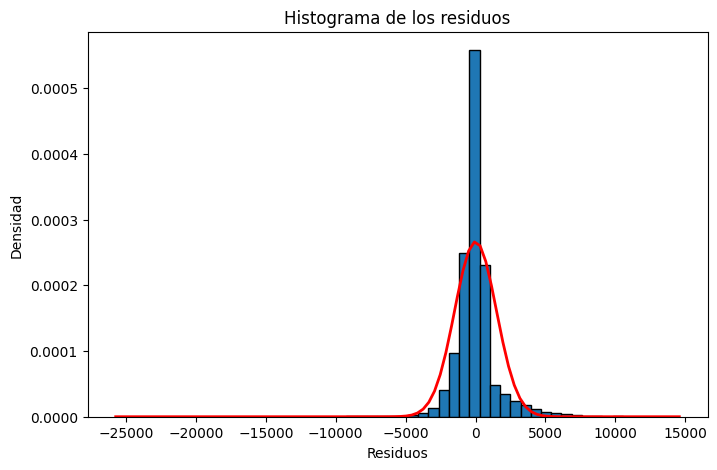

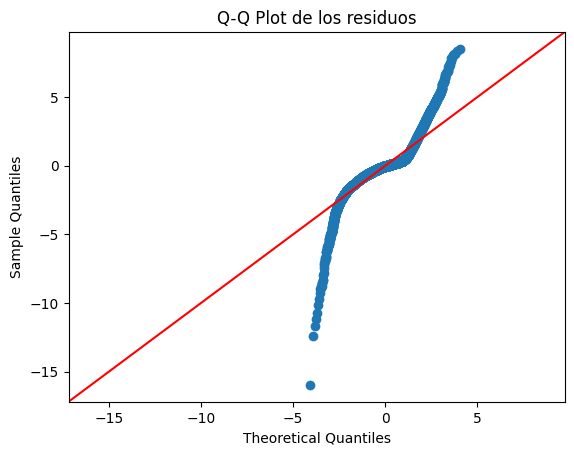


Shapiro-Wilk Test (con muestra de 5000):
Statistic: 0.8187
p-value: 0.0000
‚ùå Se rechaza la hip√≥tesis nula: los residuos no siguen una distribuci√≥n normal.


In [ ]:
import scipy.stats as stats

# 1. Calcular residuos del modelo
residuos = y_train - modelo.predict(X_train_const)

# 2. Histograma de los residuos
plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=50, edgecolor='black', density=True)
plt.title("Histograma de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Densidad")

# Opcional: sobreponer la curva normal te√≥rica
mu, std = residuos.mean(), residuos.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.show()

# 3. Q-Q plot (opcional pero recomendado)
sm.qqplot(residuos, line='45', fit=True)
plt.title("Q-Q Plot de los residuos")
plt.show()

# 4. Prueba de normalidad de Shapiro-Wilk (opcional)
stat, p = stats.shapiro(residuos.sample(5000, random_state=1))  # Shapiro no escala bien, por eso limitamos
print("\nShapiro-Wilk Test (con muestra de 5000):")
print(f"Statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")

if p > 0.05:
    print("‚úÖ No se rechaza la hip√≥tesis nula: los residuos parecen seguir una distribuci√≥n normal.")
else:
    print("‚ùå Se rechaza la hip√≥tesis nula: los residuos no siguen una distribuci√≥n normal.")


Nota: Shapiro-Wilk no es fiable en muestras muy grandes, por eso se toma una muestra de 5000 residuos.

Si la muestra es enorme, hasta peque√±as desviaciones generan un p-valor bajo (falsa alarma).

1. Histograma de los Residuos

 Observaciones:

La distribuci√≥n est√° centrada alrededor de cero, lo cual es correcto y esperado.

Sin embargo, muestra:

Alta concentraci√≥n de valores cercanos a cero (pico estrecho).

Colas alargadas a ambos lados (especialmente hacia valores negativos).

Forma asim√©trica y con curtosis alta (m√°s afilada y con colas m√°s pesadas que una normal).

 Interpretaci√≥n:

El histograma no se ajusta bien a la curva normal te√≥rica (l√≠nea roja).

Esto sugiere una distribuci√≥n leptoc√∫rtica (pico alto y colas pesadas).

Posibles outliers o valores at√≠picos extremos, especialmente en la cola izquierda.

2. Q-Q Plot de los Residuos

Observaciones:

Los puntos se desv√≠an claramente de la l√≠nea diagonal.

Se observa una curva en forma de S invertida:

Cuantiles inferiores (izquierda) est√°n muy por debajo de la l√≠nea ‚Üí colas m√°s pesadas.

Cuantiles superiores tambi√©n se desv√≠an.

Desviaci√≥n sistem√°tica = no normalidad.

Interpretaci√≥n:

El Q-Q plot indica que los residuos no siguen una distribuci√≥n normal.

Hay evidencia clara de asimetr√≠a y curtosis.

Es probable que existan valores at√≠picos fuertes en ambas colas.